In [2]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv("./canadian_immegration_data.csv" )


In [33]:
# Display the first few rows of the dataframe
data.head()



data.info()

data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    195 non-null    object
 1   Continent  195 non-null    object
 2   Region     195 non-null    object
 3   DevName    195 non-null    object
 4   1980       195 non-null    int64 
 5   1981       195 non-null    int64 
 6   1982       195 non-null    int64 
 7   1983       195 non-null    int64 
 8   1984       195 non-null    int64 
 9   1985       195 non-null    int64 
 10  1986       195 non-null    int64 
 11  1987       195 non-null    int64 
 12  1988       195 non-null    int64 
 13  1989       195 non-null    int64 
 14  1990       195 non-null    int64 
 15  1991       195 non-null    int64 
 16  1992       195 non-null    int64 
 17  1993       195 non-null    int64 
 18  1994       195 non-null    int64 
 19  1995       195 non-null    int64 
 20  1996       195 non-null    int64

Country      0
Continent    0
Region       0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
Total        0
dtype: int64

In [8]:
data.columns.values



array(['Country', 'Continent', 'Region', 'DevName', '1980', '1981',
       '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       'Total'], dtype=object)

/var/folders/86/xb6c8r5s72l8lbz72z7mn0jr0000gn/T/ipykernel_14688/3801903170.py:8: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



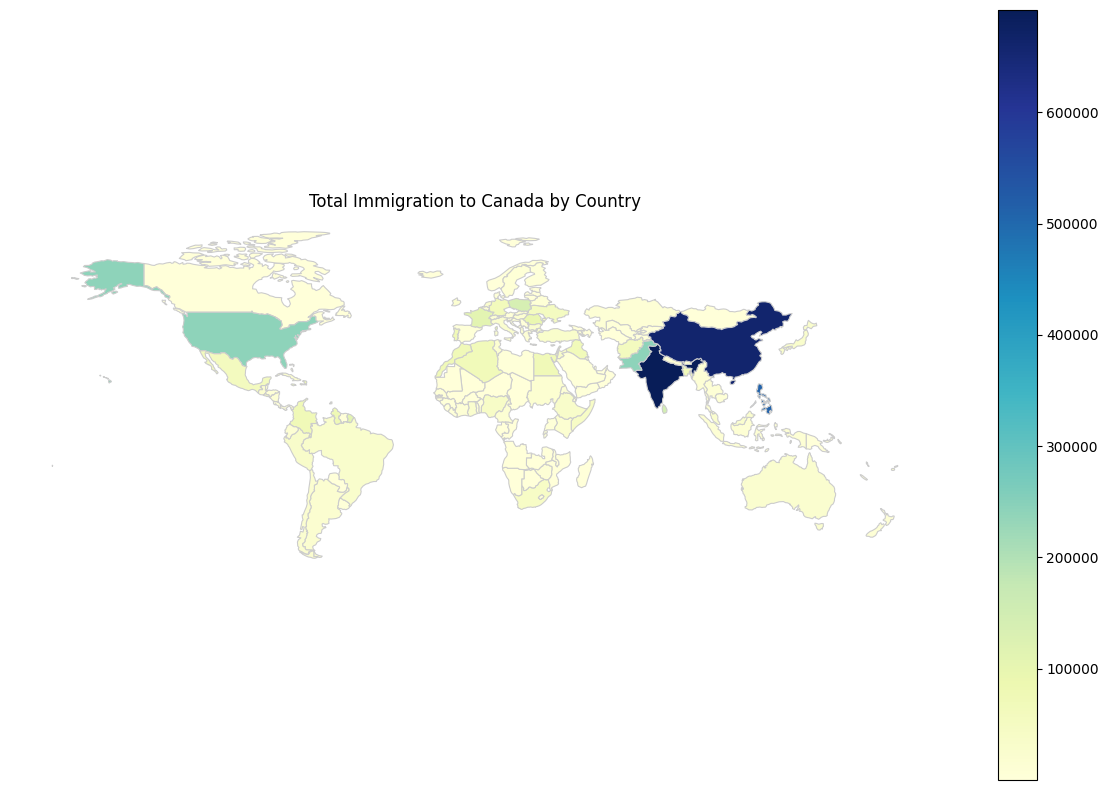

In [100]:
import geopandas as gpd
import matplotlib.pyplot as plt

table1 =  data.pivot_table(values='Total', index='Country',  aggfunc='sum')


# Load world shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge immigration data with world shapefile
merged_data = world.merge(table1, how='left', left_on='name', right_index=True)

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_data.plot(column='Total', cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)







# Set plot title and axis labels
plt.title('Total Immigration to Canada by Country')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Remove axes
ax.set_axis_off()

plt.show()


In [24]:
table1.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Total')
plt.title('Total Immigration by Country')
plt.show()



NameError: name 'table1' is not defined

Trend Analysis over time

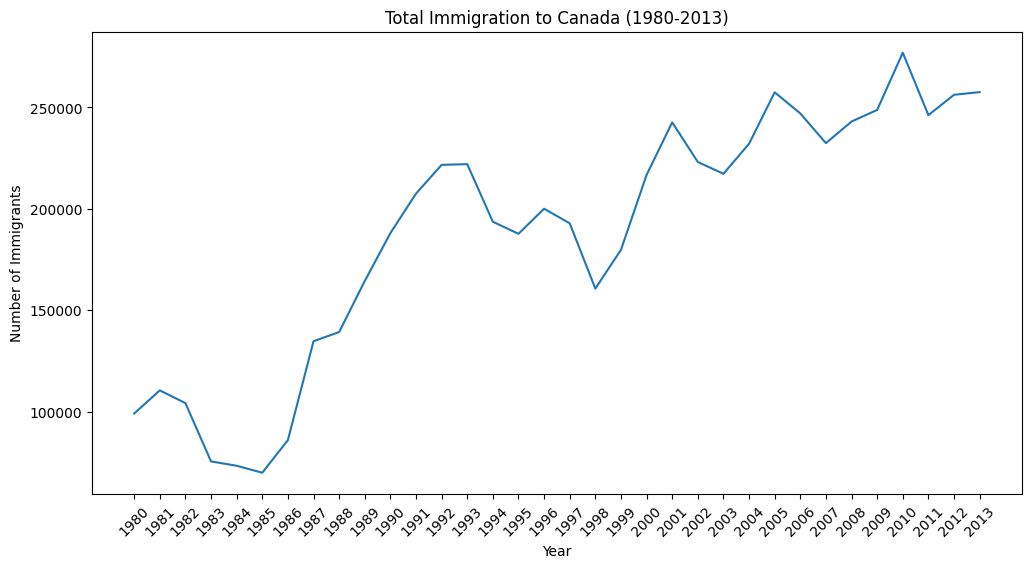

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert years to integers
years = list(map(str, range(1980, 2014)))

# Sum of immigrants per year
yearly_data = data[years].sum()

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_data)
plt.title('Total Immigration to Canada (1980-2013)')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.xticks( rotation=45)
plt.show()


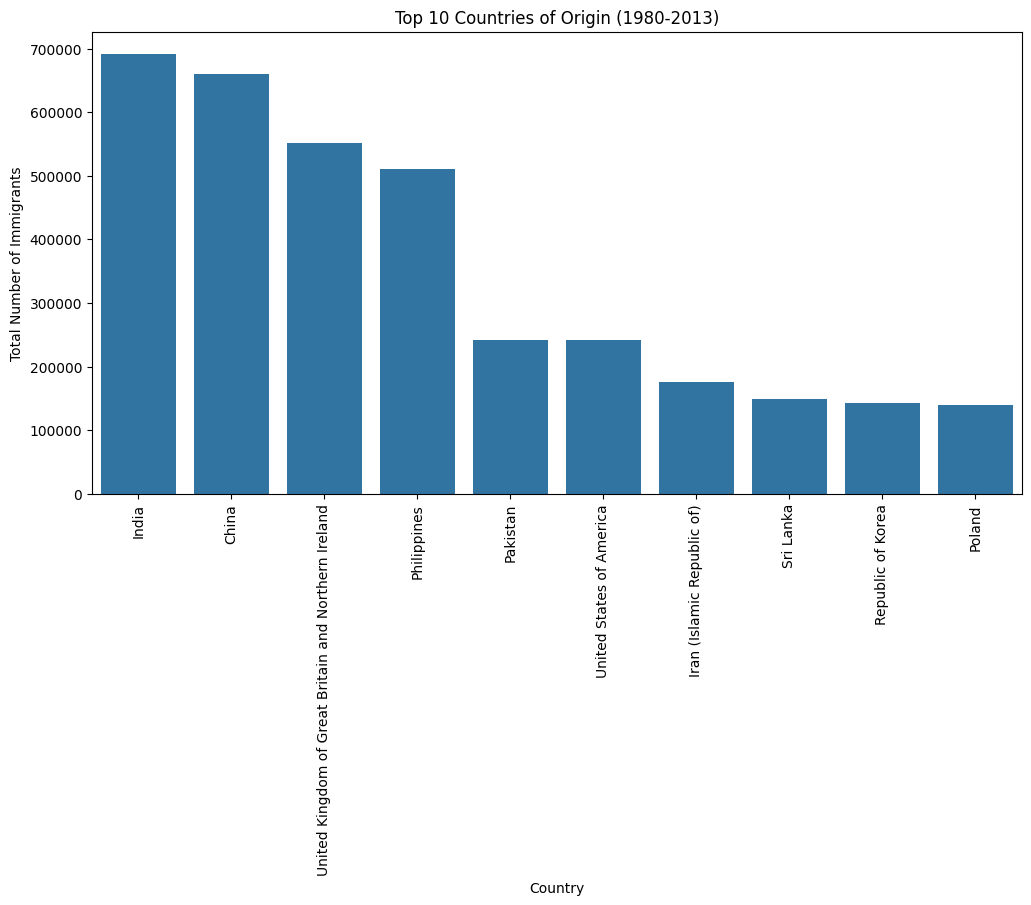

In [36]:
# Calculate the total number of immigrants per country
data['Total'] = data[years].sum(axis=1)

# Top 10 countries
top_countries = data.nlargest(10, 'Total')

plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries['Country'], y=top_countries['Total'])
plt.title('Top 10 Countries of Origin (1980-2013)')
plt.xlabel('Country')
plt.ylabel('Total Number of Immigrants')
plt.xticks(rotation=90)
plt.show()


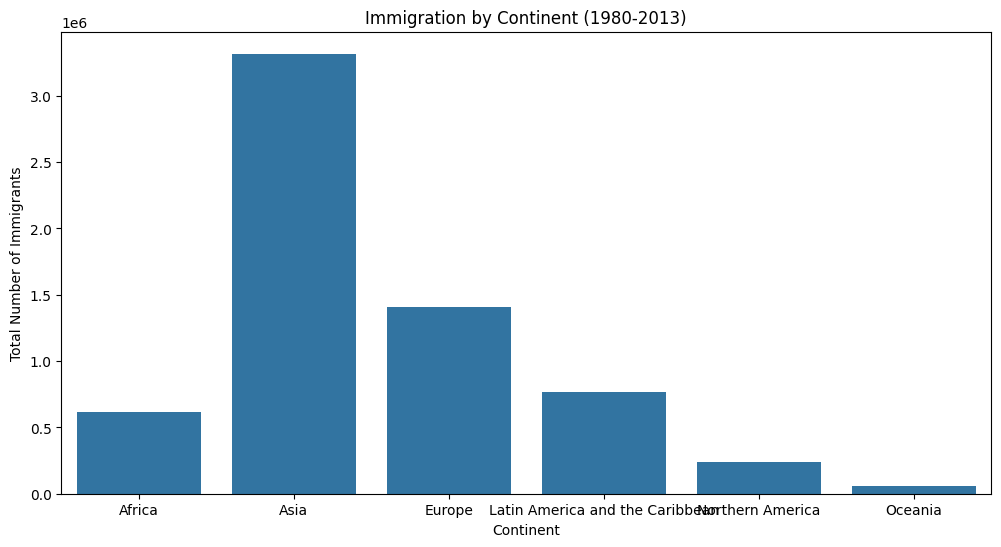

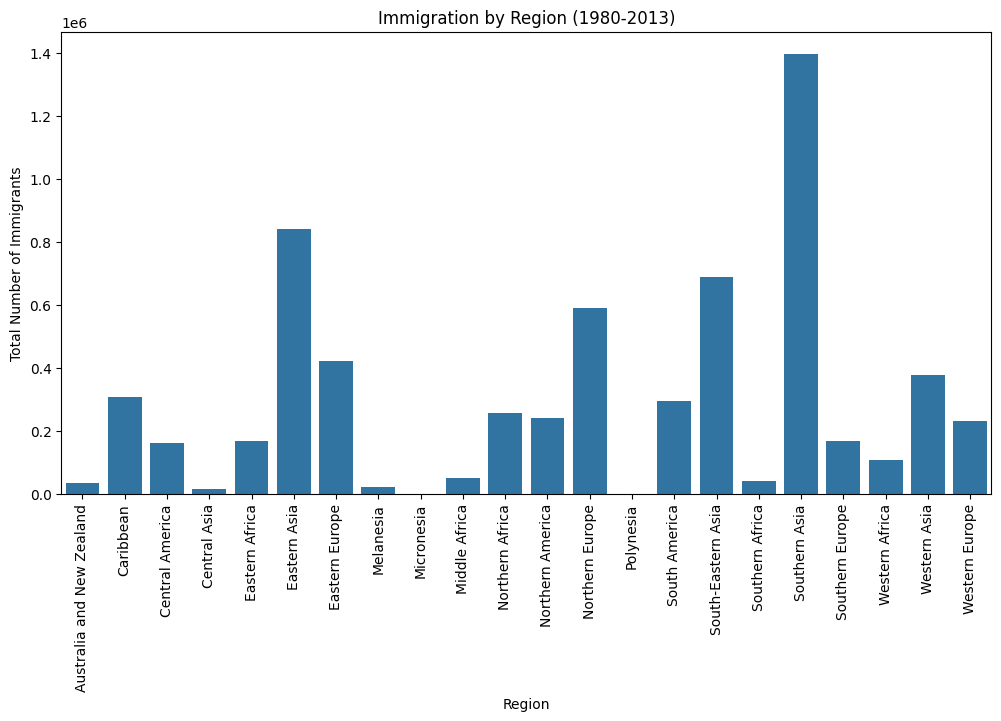

In [37]:
# Immigration by continent
continent_data = data.groupby('Continent')[years].sum().sum(axis=1)

plt.figure(figsize=(12, 6))
sns.barplot(x=continent_data.index, y=continent_data.values)
plt.title('Immigration by Continent (1980-2013)')
plt.xlabel('Continent')
plt.ylabel('Total Number of Immigrants')
plt.show()

# Immigration by region
region_data = data.groupby('Region')[years].sum().sum(axis=1)

plt.figure(figsize=(12, 6))
sns.barplot(x=region_data.index, y=region_data.values)
plt.title('Immigration by Region (1980-2013)')
plt.xlabel('Region')
plt.ylabel('Total Number of Immigrants')
plt.xticks(rotation=90)
plt.show()


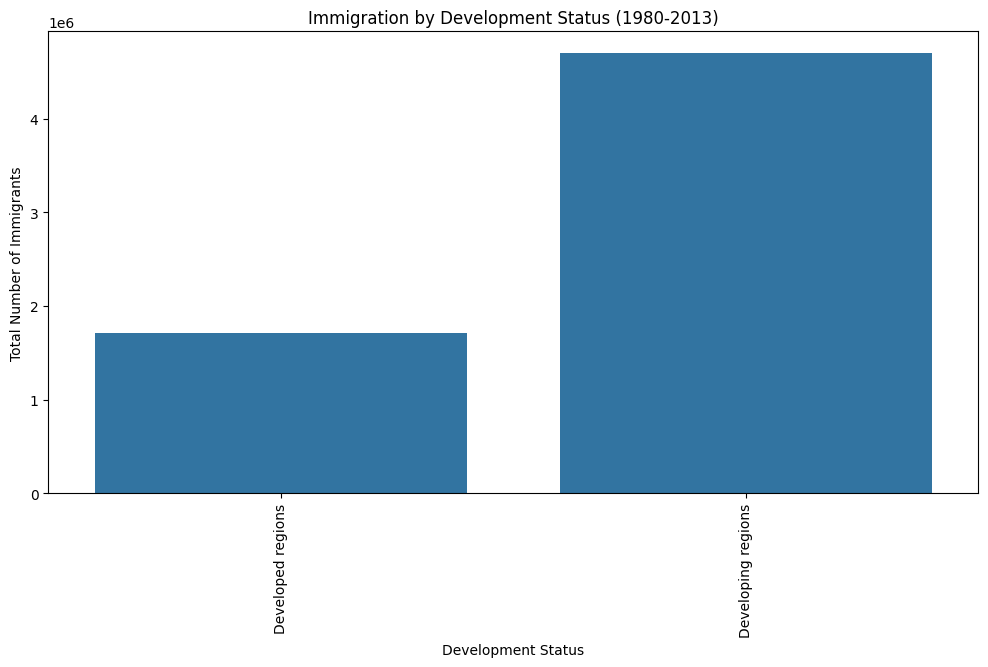

In [38]:
# Immigration by development status
dev_data = data.groupby('DevName')[years].sum().sum(axis=1)

plt.figure(figsize=(12, 6))
sns.barplot(x=dev_data.index, y=dev_data.values)
plt.title('Immigration by Development Status (1980-2013)')
plt.xlabel('Development Status')
plt.ylabel('Total Number of Immigrants')
plt.xticks(rotation=90)
plt.show()


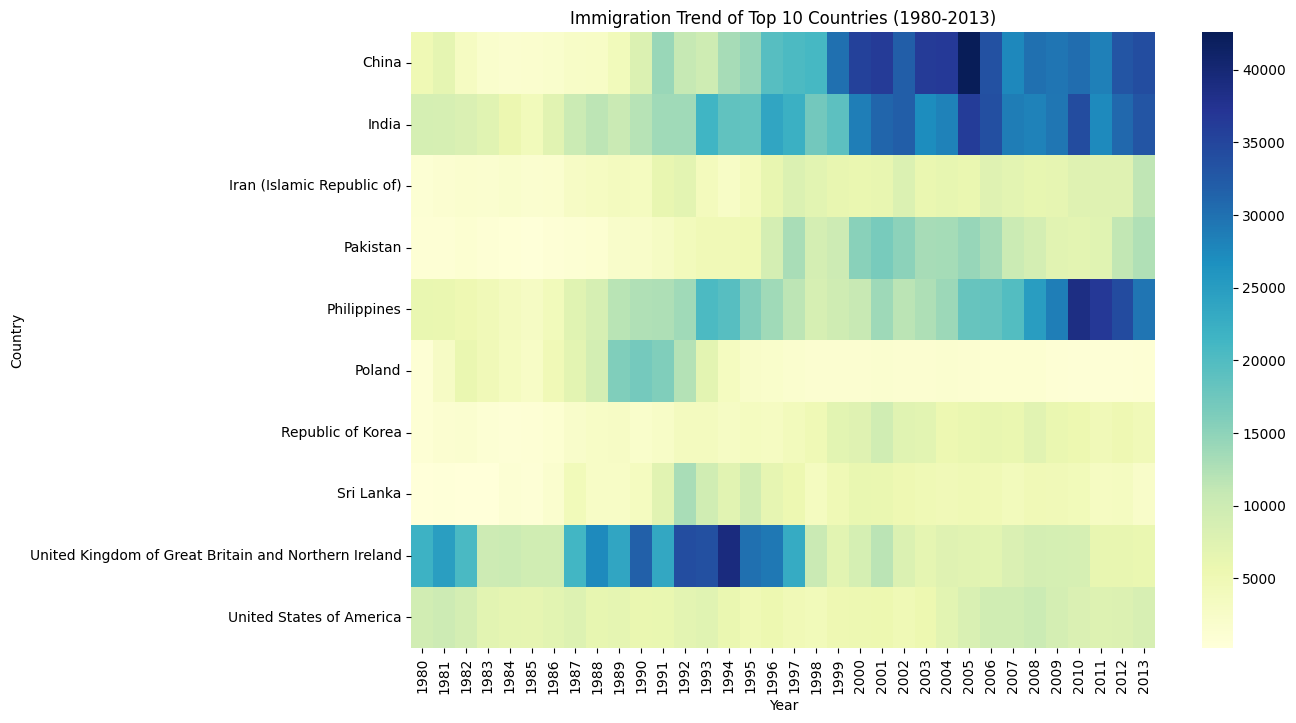

In [83]:
# Select top 10 countries for heatmap
top_10_countries = top_countries['Country'].tolist()
heatmap_data = data[data['Country'].isin(top_10_countries)].set_index('Country')[years]

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=False, fmt="d", cmap="YlGnBu")
plt.title('Immigration Trend of Top 10 Countries (1980-2013)')
plt.xlabel('Year')
plt.ylabel('Country')
plt.show()


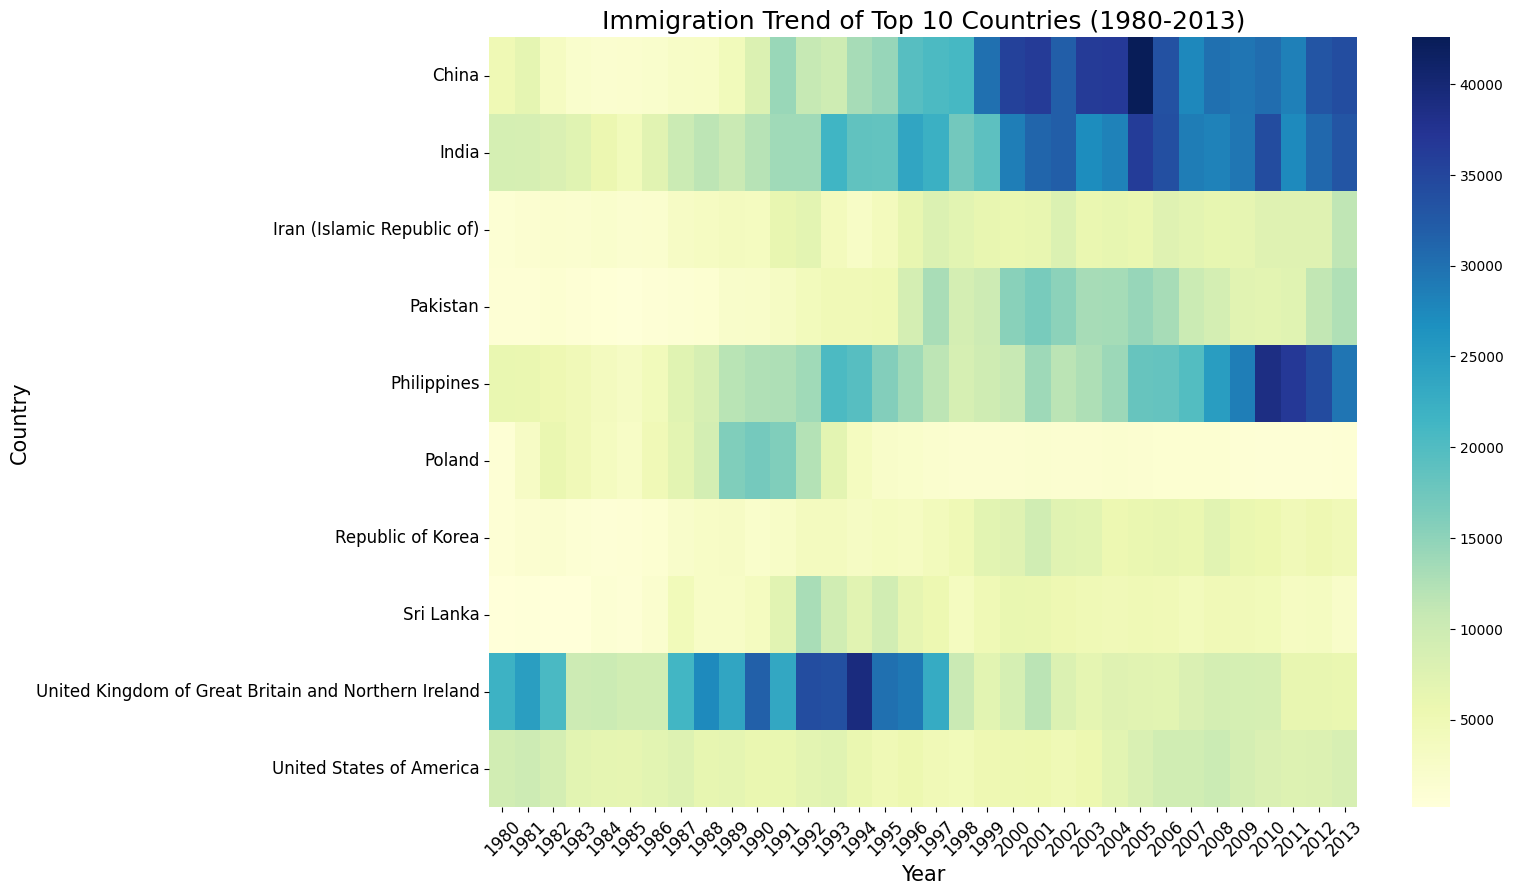

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10))

# Create the heatmap without annotations
sns.heatmap(heatmap_data, annot=False, cmap="YlGnBu")

# Set titles and labels
plt.title('Immigration Trend of Top 10 Countries (1980-2013)', fontsize=18)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Country', fontsize=15)

# Increase the font size of the x and y ticks
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.show()


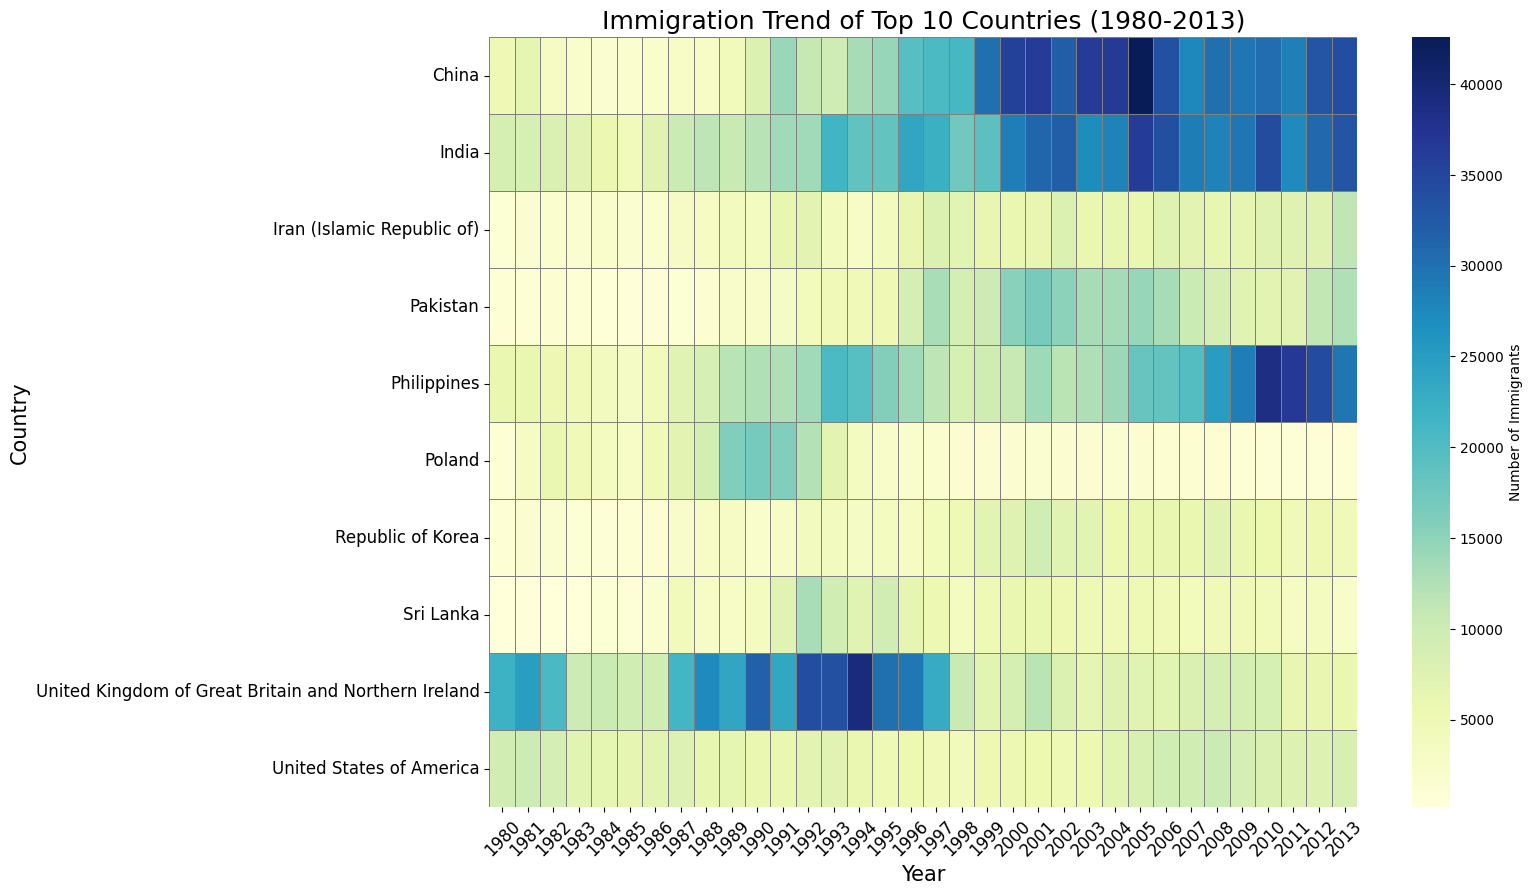

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10))

# Create the heatmap without annotations
sns.heatmap(heatmap_data, annot=False, cmap="YlGnBu",
            linewidths=.5, linecolor='gray', cbar_kws={'label': 'Number of Immigrants'})

# Set titles and labels
plt.title('Immigration Trend of Top 10 Countries (1980-2013)', fontsize=18)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Country', fontsize=15)

# Increase the font size of the x and y ticks
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.show()


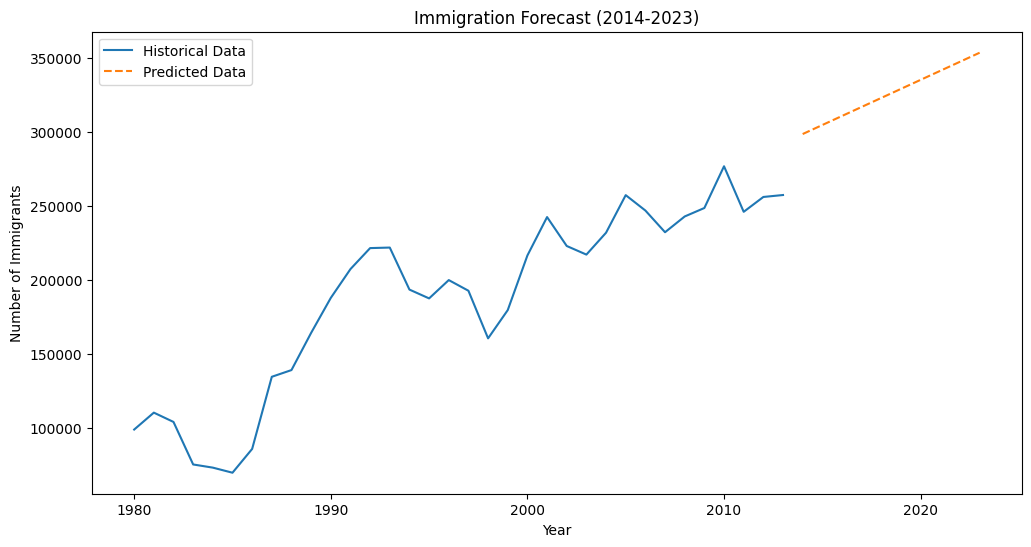

In [76]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Preparing the data for modeling
year_nums = np.array(range(1980, 2014)).reshape(-1, 1)
total_immigrants = yearly_data.values

# Splitting the data
X_train, X_test = year_nums[:-5], year_nums[-5:]
y_train, y_test = total_immigrants[:-5], total_immigrants[-5:]

# Training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting future immigration
future_years = np.array(range(2014, 2024)).reshape(-1, 1)
predictions = model.predict(future_years)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(year_nums, total_immigrants, label='Historical Data')
plt.plot(future_years, predictions, label='Predicted Data', linestyle='--')
plt.title('Immigration Forecast (2014-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.legend()
plt.show()


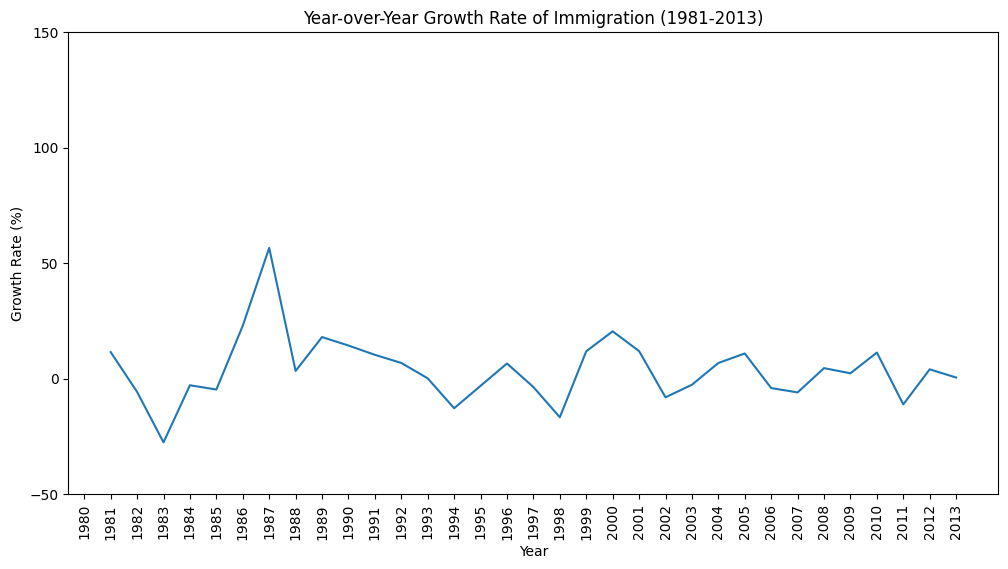

In [71]:
# Calculate year-over-year growth rate
yearly_data_pct_change = yearly_data.pct_change() * 100

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_data_pct_change)
plt.title('Year-over-Year Growth Rate of Immigration (1981-2013)')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.yticks(ticks=range(-50, 200, 50))
plt.xticks(rotation=90)
plt.show()


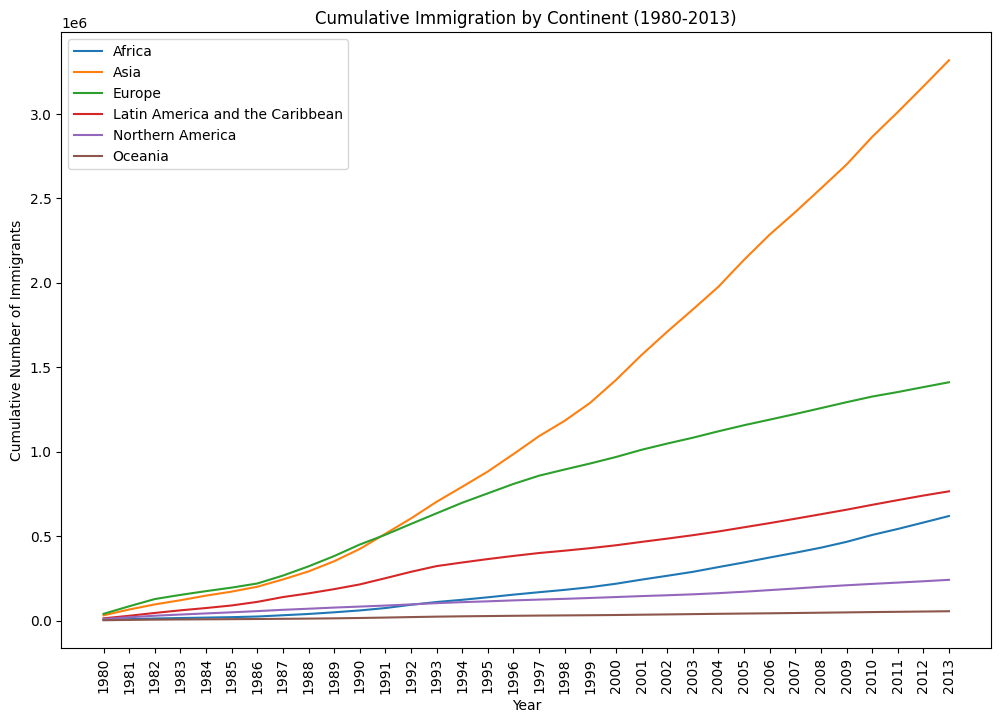

In [74]:
# Cumulative sum of immigrants by continent
continent_cumulative = data.groupby('Continent')[years].sum().cumsum(axis=1)

plt.figure(figsize=(12, 8))
for continent in continent_cumulative.index:
    plt.plot(continent_cumulative.columns, continent_cumulative.loc[continent], label=continent)

plt.title('Cumulative Immigration by Continent (1980-2013)')
plt.xlabel('Year')
plt.ylabel('Cumulative Number of Immigrants')
plt.xticks(rotation=90)
plt.yticks(ticks=range(0, 3000001, 500000))
plt.legend()
plt.show()


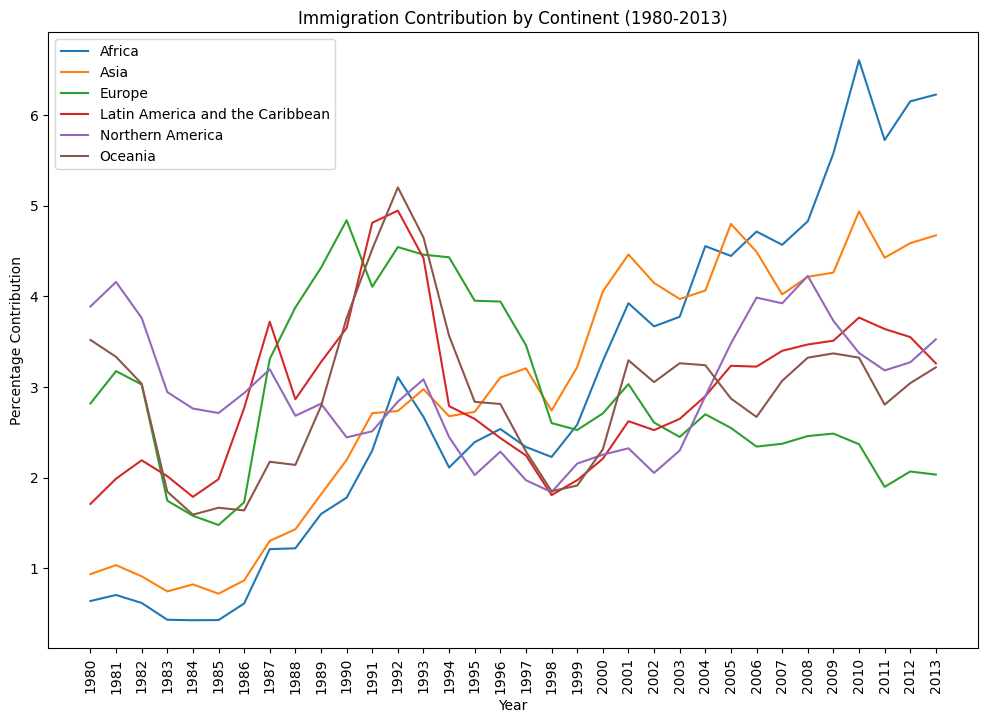

In [64]:
# Percentage contribution by continent
continent_percentage = data.groupby('Continent')[years].sum().apply(lambda x: x / x.sum() * 100, axis=1)

plt.figure(figsize=(12, 8))
for continent in continent_percentage.index:
    plt.plot(continent_percentage.columns, continent_percentage.loc[continent], label=continent)

plt.title('Immigration Contribution by Continent (1980-2013)')
plt.xlabel('Year')
plt.ylabel('Percentage Contribution')
plt.legend()
plt.xticks(rotation=90)
plt.show()


In [48]:
# Function to get top 5 countries for a given decade
def top_countries_by_decade(df, start_year, end_year):
    decade_data = df[['Country'] + list(map(str, range(start_year, end_year+1)))]
    decade_data['Total'] = decade_data[list(map(str, range(start_year, end_year+1)))].sum(axis=1)
    top_5_countries = decade_data.nlargest(5, 'Total')[['Country', 'Total']]
    return top_5_countries

# Get top 5 countries for each decade
decades = [(1980, 1989), (1990, 1999), (2000, 2009), (2010, 2013)]
for start, end in decades:
    top_5 = top_countries_by_decade(data, start, end)
    print(f'Top 5 countries from {start} to {end}:')
    print(top_5)
    print()


Top 5 countries from 1980 to 1989:
                                               Country   Total
183  United Kingdom of Great Britain and Northern I...  179171
79                                               India   82154
185                           United States of America   76824
136                                        Philippines   60764
137                                             Poland   57602

Top 5 countries from 1990 to 1999:
                                               Country   Total
183  United Kingdom of Great Britain and Northern I...  261966
79                                               India  180395
36                                               China  161528
136                                        Philippines  138482
162                                          Sri Lanka   70421

Top 5 countries from 2000 to 2009:
                                               Country   Total
36                                               China  340385
79         

/var/folders/86/xb6c8r5s72l8lbz72z7mn0jr0000gn/T/ipykernel_14688/3633163009.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/86/xb6c8r5s72l8lbz72z7mn0jr0000gn/T/ipykernel_14688/3633163009.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/86/xb6c8r5s72l8lbz72z7mn0jr0000gn/T/ipykernel_14688/3633163009.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

Correlation analysis

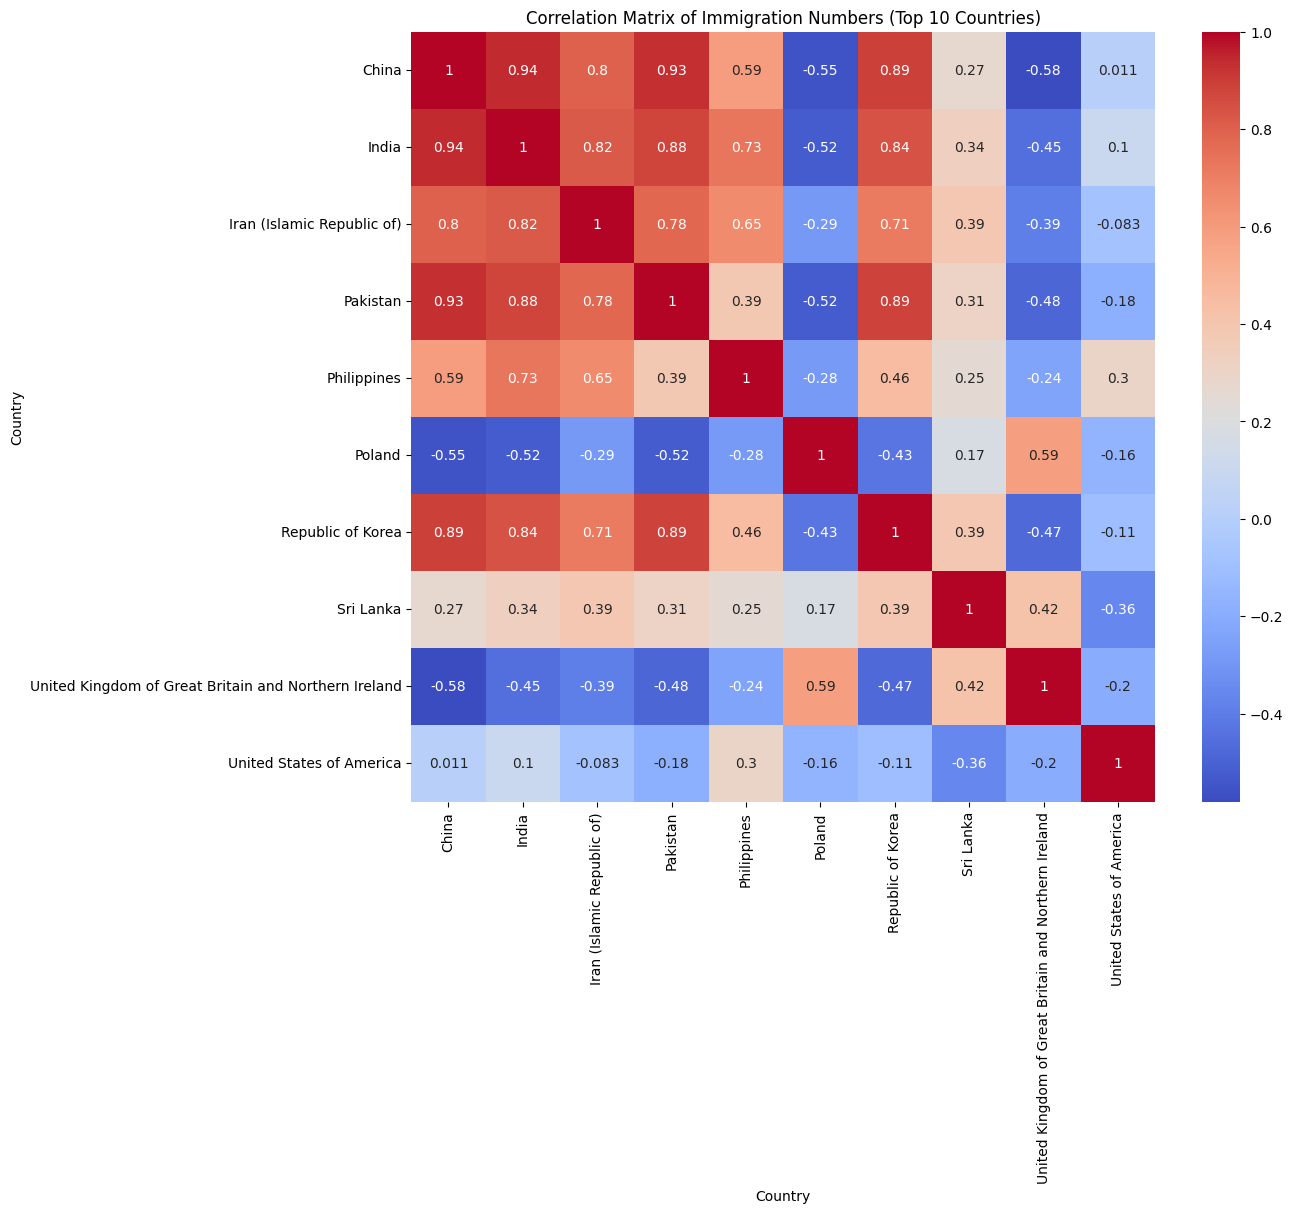

In [49]:
# Correlation matrix for top 10 countries
top_10_countries_data = data[data['Country'].isin(top_10_countries)].set_index('Country')[years].transpose()

plt.figure(figsize=(12, 10))
sns.heatmap(top_10_countries_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Immigration Numbers (Top 10 Countries)')
plt.show()


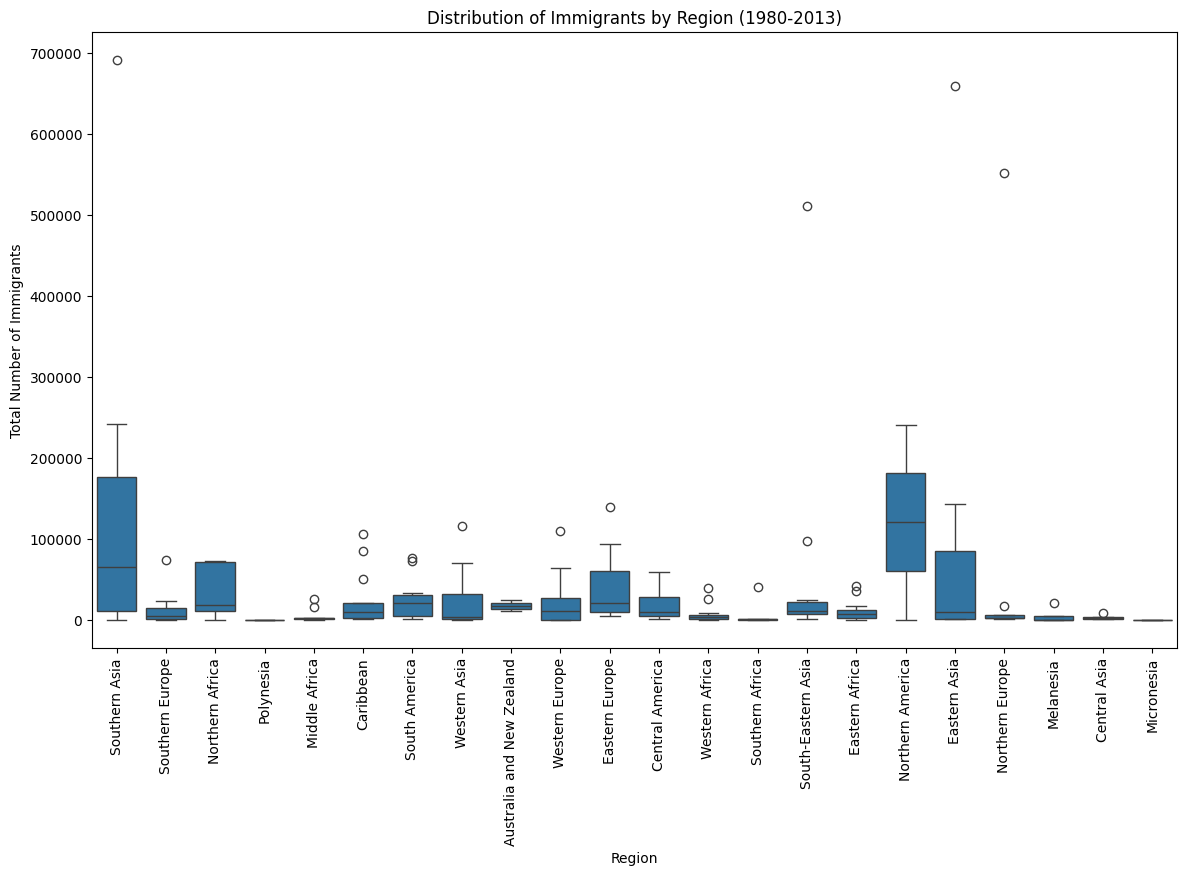

In [51]:
# Box plot for regions
plt.figure(figsize=(14, 8))
sns.boxplot(x='Region', y='Total', data=data)
plt.title('Distribution of Immigrants by Region (1980-2013)')
plt.xlabel('Region')
plt.ylabel('Total Number of Immigrants')
plt.xticks(rotation=90)
plt.show()


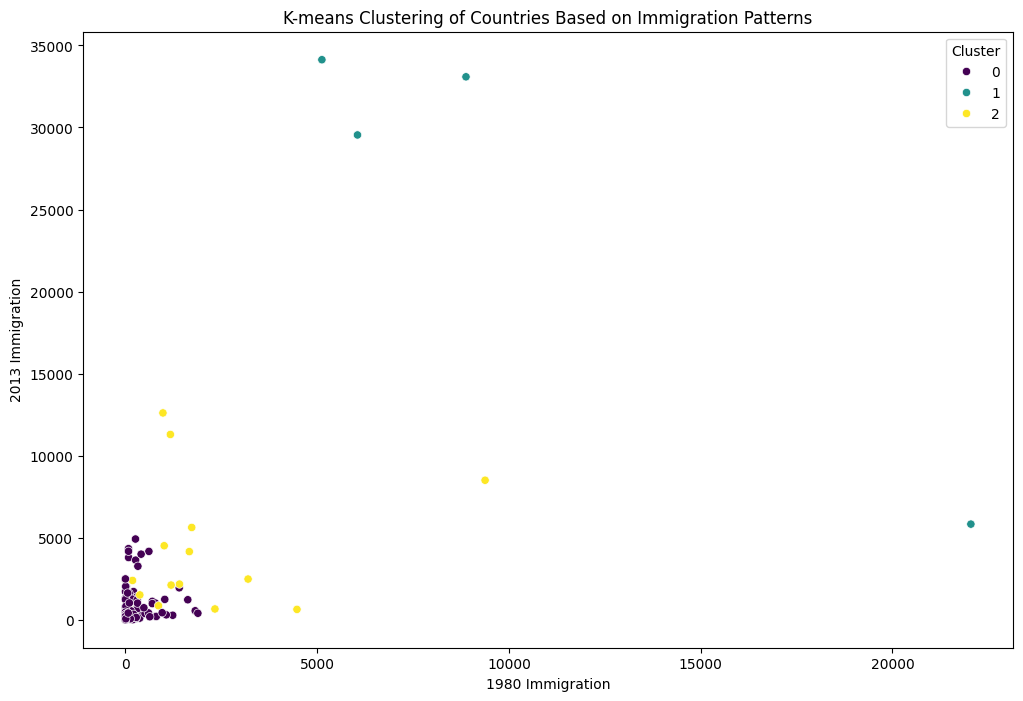

In [53]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[years])

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Plot the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='1980', y='2013', hue='Cluster', data=data, palette='viridis')
plt.title('K-means Clustering of Countries Based on Immigration Patterns')
plt.xlabel('1980 Immigration')
plt.ylabel('2013 Immigration')
plt.show()


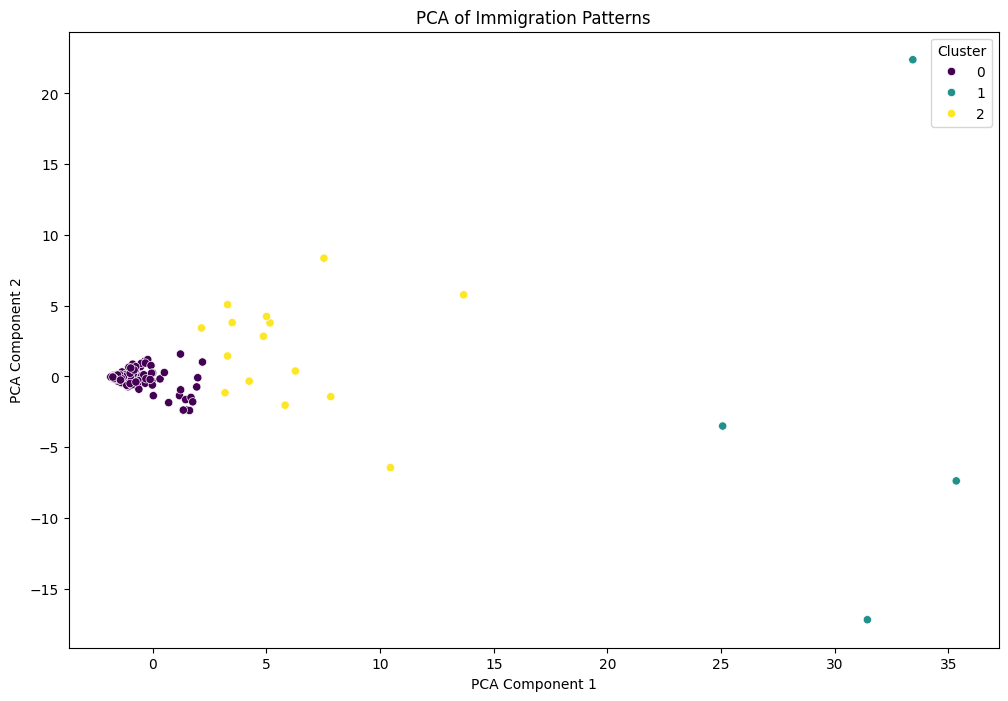

In [54]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Add PCA components to the dataframe
data['PCA1'] = pca_data[:, 0]
data['PCA2'] = pca_data[:, 1]

# Plot PCA components
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data, palette='viridis')
plt.title('PCA of Immigration Patterns')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


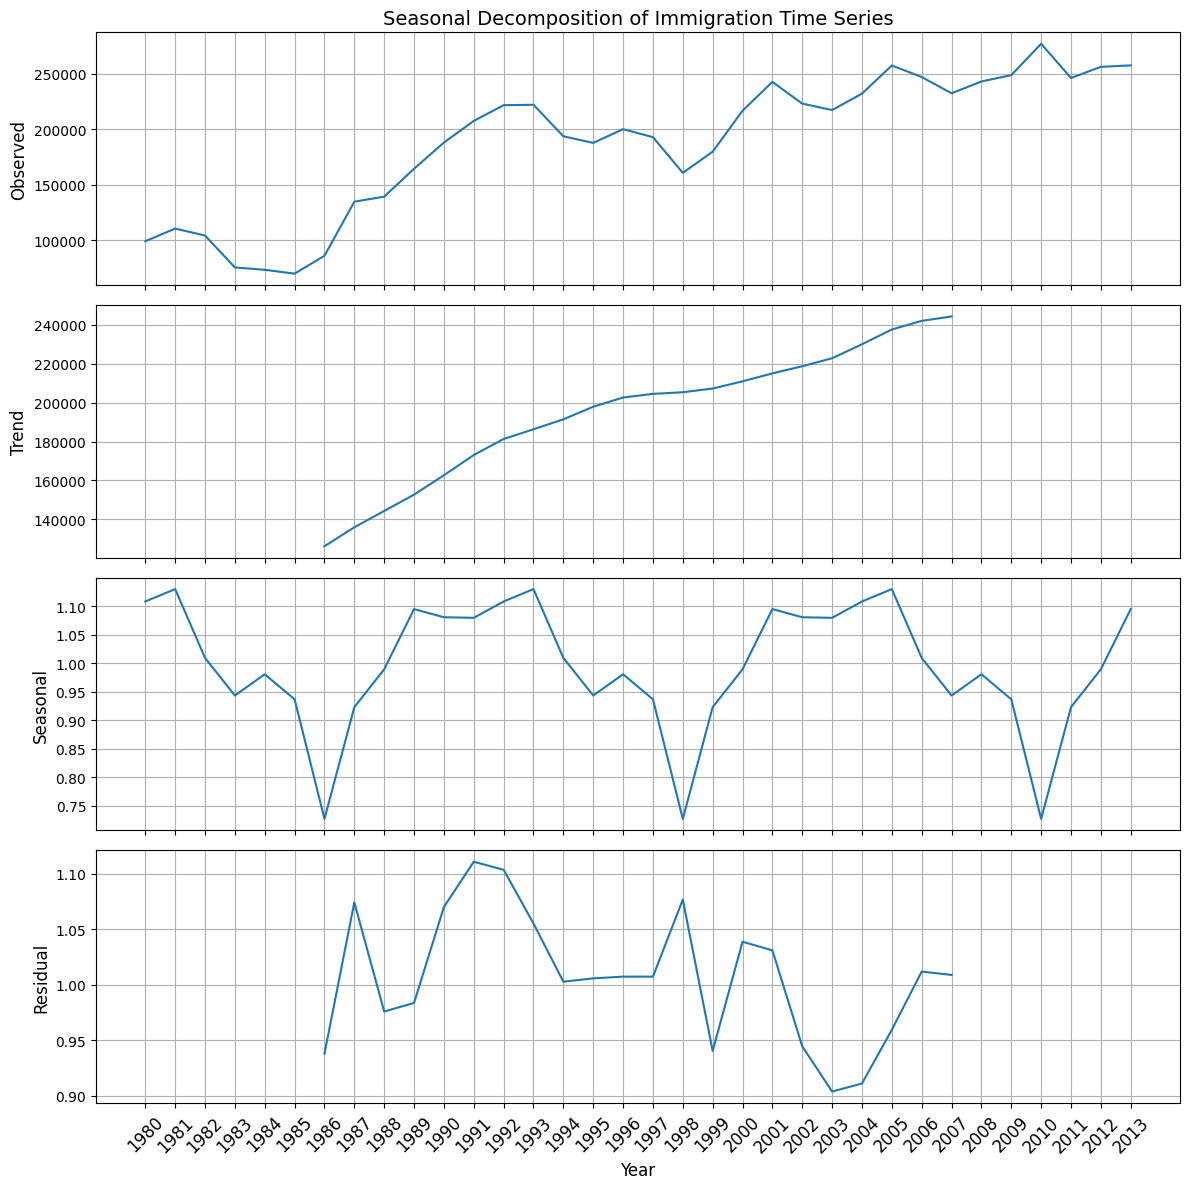

In [63]:
from statsmodels.tsa.seasonal import seasonal_decompose


# Define the list of years
years = list(map(str, range(1980, 2014)))

# Sum immigration data across all countries for each year
yearly_totals = data[years].sum()

# Decompose the time series
result = seasonal_decompose(yearly_totals, model='multiplicative', period=12)

# Plot the decomposition with improved x-axis labels
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 12), sharex=True)

# Observed
ax1.plot(result.observed)
ax1.set_ylabel('Observed', fontsize=12)
ax1.set_title('Seasonal Decomposition of Immigration Time Series', fontsize=14)
ax1.grid(True)

# Trend
ax2.plot(result.trend)
ax2.set_ylabel('Trend', fontsize=12)
ax2.grid(True)

# Seasonal
ax3.plot(result.seasonal)
ax3.set_ylabel('Seasonal', fontsize=12)
ax3.grid(True)

# Residual
ax4.plot(result.resid)
ax4.set_ylabel('Residual', fontsize=12)
ax4.set_xlabel('Year', fontsize=12)
ax4.grid(True)

# Improve x-axis labels formatting
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()



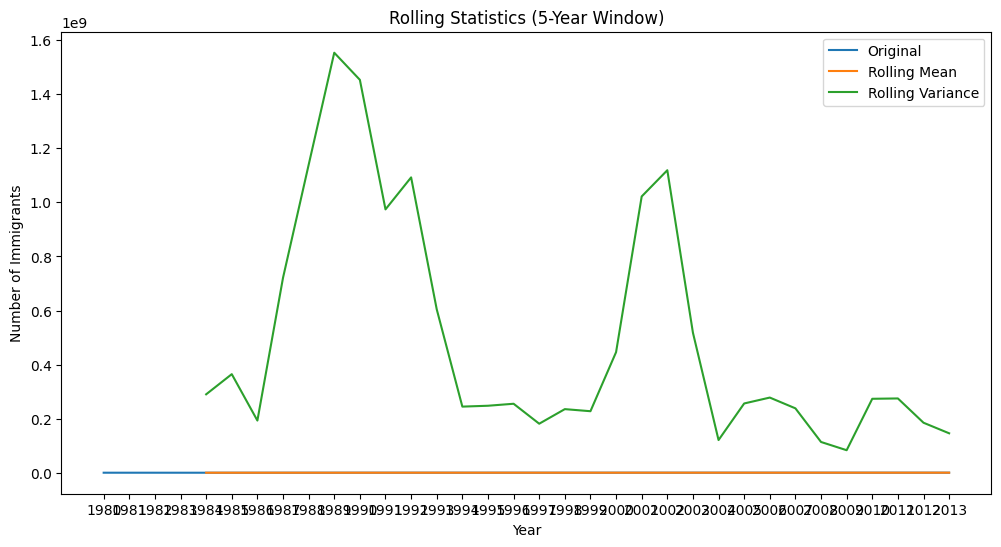

In [60]:
# Calculate rolling mean and variance
rolling_mean = yearly_totals.rolling(window=5).mean()
rolling_var = yearly_totals.rolling(window=5).var()

plt.figure(figsize=(12, 6))
plt.plot(yearly_totals, label='Original')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_var, label='Rolling Variance')
plt.title('Rolling Statistics (5-Year Window)')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.legend()
plt.show()
